In [87]:
import spotipy
import spotipy.util as util
import json
from config import client_id, client_secret, redirect_uri, username, good_playlist_id, bad_playlist_id

token =util.oauth2.SpotifyClientCredentials(client_id, client_secret)
cache_token = token.get_access_token()
spotify = spotipy.Spotify(cache_token)

In [88]:
artist_names = []
artist_uris = []
artist_list = ['Britney Spears','Lady Gaga','Katy Perry',
               'Ariana Grande','Taylor Swift','Beyonce', 
               'Rihanna','Adele', 'Demi Lovato', 'Miley Cyrus',
               'Sia', 'Selena Gomez', 'Jennifer Lopez']

for artist in artist_list:
    results = spotify.search(q=artist, type='artist')
    artist_name = results['artists']['items'][0]['name']
    artist_uri = results['artists']['items'][0]['uri']
    
    artist_names.append(artist_name)
    artist_uris.append(artist_uri)

In [89]:
artist_dict = dict(zip(artist_names, artist_uris))
artist_dict

{'Britney Spears': 'spotify:artist:26dSoYclwsYLMAKD3tpOr4',
 'Lady Gaga': 'spotify:artist:1HY2Jd0NmPuamShAr6KMms',
 'Katy Perry': 'spotify:artist:6jJ0s89eD6GaHleKKya26X',
 'Ariana Grande': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR',
 'Taylor Swift': 'spotify:artist:06HL4z0CvFAxyc27GXpf02',
 'Beyoncé': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m',
 'Rihanna': 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H',
 'Adele': 'spotify:artist:4dpARuHxo51G3z768sgnrY',
 'Demi Lovato': 'spotify:artist:6S2OmqARrzebs0tKUEyXyp',
 'Miley Cyrus': 'spotify:artist:5YGY8feqx7naU7z4HrwZM6',
 'Sia': 'spotify:artist:5WUlDfRSoLAfcVSX1WnrxN',
 'Selena Gomez': 'spotify:artist:0C8ZW7ezQVs4URX5aX7Kqx',
 'Jennifer Lopez': 'spotify:artist:2DlGxzQSjYe5N6G9nkYghR'}

In [114]:
results = spotify.artist_albums(artist_dict['Britney Spears'], album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

album_ids = []
album_names = []
for album in albums:
    #print(album['name'] + ': ' + album['id'])
    album_ids.append(album['id'])
    album_names.append(album['name'])

In [115]:
album_names

['Glory : Japan Tour Edition',
 'Glory (Japan Deluxe Version)',
 'Glory (Deluxe Version)',
 'Glory (Deluxe Version)',
 'Britney Jean (Deluxe Version)',
 'Britney Jean (Deluxe Version)',
 'Femme Fatale (Deluxe Version)',
 'Circus (Deluxe Version)',
 'Blackout',
 'In The Zone',
 'Britney (Digital Deluxe Version)',
 'Oops!... I Did It Again',
 '...Baby One More Time (Digital Deluxe Version)']

In [91]:
album_dict = dict(zip(album_names, album_ids))
album_dict

{'Glory : Japan Tour Edition': '7de9JdO8rQxVOJ9NE3WuiN',
 'Glory (Japan Deluxe Version)': '6IM1rlrohJp2B4QtA6dLDy',
 'Glory (Deluxe Version)': '7gALIuQHKvpZR8EtbNZ7qK',
 'Britney Jean (Deluxe Version)': '3EtFDjphtVD1GzTRTVmCDd',
 'Femme Fatale (Deluxe Version)': '0oFBaXLFsUVa2gEmJf4FcJ',
 'Circus (Deluxe Version)': '2tve5DGwub1TtbX1khPX5j',
 'Blackout': '1ePkYcH5ZQCb1b4tQeiEDj',
 'In The Zone': '0z7pVBGOD7HCIB7S8eLkLI',
 'Britney (Digital Deluxe Version)': '5ax3GTsfX5uCUaNgnJsSG5',
 'Oops!... I Did It Again': '5PmgtkodFl2Om3hMXONDll',
 '...Baby One More Time (Digital Deluxe Version)': '3WNxdumkSMGMJRhEgK80qx'}

In [108]:
album_names = []
all_features = []

for k, v in album_dict.items():
    album_names.append(k)
    results = spotify.album_tracks(v, limit=50, offset=0)
    tracks = results['items']

    track_ids = []
    track_names = []
    for track in tracks:
        track_ids.append(track['id'])
        track_names.append(track['name'])
    
    features = spotify.audio_features(tracks=track_ids)
    all_features.append(features)
#     album_tracks = dict(zip(track_names, track_ids))
#     album_name_id = {k: v}
#     album = [album_name_id, album_tracks]
#     all_albums.append(album)

In [109]:
import pandas as pd

columns = list(all_features[0][0].keys())
columns.sort()
columns.append('album_name')

df_features = pd.DataFrame(columns = columns)

# convert to df
# instantiate empty dataframe
for album in range(0, len(all_features)):
    df_temp = pd.DataFrame(all_features[album], columns = columns)
    df_temp['album_name'] = album_names[album]
    df_features = df_features.append(df_temp, ignore_index=True)

In [110]:
album_names

['Glory : Japan Tour Edition',
 'Glory (Japan Deluxe Version)',
 'Glory (Deluxe Version)',
 'Britney Jean (Deluxe Version)',
 'Femme Fatale (Deluxe Version)',
 'Circus (Deluxe Version)',
 'Blackout',
 'In The Zone',
 'Britney (Digital Deluxe Version)',
 'Oops!... I Did It Again',
 '...Baby One More Time (Digital Deluxe Version)']

In [111]:
df_features
# df_features['album_name'] = album_names[0]
# df_features

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,album_name
0,0.02490,https://api.spotify.com/v1/audio-analysis/5IQf...,0.365,199080,0.652,5IQfrplrNZJXORHpjPXDeq,0.000060,6,0.0979,-7.205,1,0.1340,113.941,4,https://api.spotify.com/v1/tracks/5IQfrplrNZJX...,audio_features,spotify:track:5IQfrplrNZJXORHpjPXDeq,0.161,Glory : Japan Tour Edition
1,0.00699,https://api.spotify.com/v1/audio-analysis/1z0J...,0.747,202347,0.695,1z0J71iYVAyJmxr179y0Pb,0.001860,4,0.1010,-6.032,0,0.0565,120.997,4,https://api.spotify.com/v1/tracks/1z0J71iYVAyJ...,audio_features,spotify:track:1z0J71iYVAyJmxr179y0Pb,0.424,Glory : Japan Tour Edition
2,0.18900,https://api.spotify.com/v1/audio-analysis/1h1f...,0.695,231040,0.699,1h1fg1HAKvp5WANl1mxFCJ,0.000000,7,0.2300,-6.662,0,0.0925,123.001,4,https://api.spotify.com/v1/tracks/1h1fg1HAKvp5...,audio_features,spotify:track:1h1fg1HAKvp5WANl1mxFCJ,0.582,Glory : Japan Tour Edition
3,0.20500,https://api.spotify.com/v1/audio-analysis/7kvO...,0.754,235240,0.460,7kvONn7AB0DL5aUcLQaccB,0.000001,2,0.4860,-5.870,1,0.0441,112.517,3,https://api.spotify.com/v1/tracks/7kvONn7AB0DL...,audio_features,spotify:track:7kvONn7AB0DL5aUcLQaccB,0.542,Glory : Japan Tour Edition
4,0.02990,https://api.spotify.com/v1/audio-analysis/1af5...,0.714,226667,0.662,1af534zOzpA1RnxPHrURXF,0.000010,7,0.1010,-5.963,0,0.0392,110.026,4,https://api.spotify.com/v1/tracks/1af534zOzpA1...,audio_features,spotify:track:1af534zOzpA1RnxPHrURXF,0.301,Glory : Japan Tour Edition
5,0.14700,https://api.spotify.com/v1/audio-analysis/0ON8...,0.462,241413,0.505,0ON8ZEOngTtCkZ3RIzzVLj,0.005250,9,0.1430,-9.772,0,0.1210,184.246,4,https://api.spotify.com/v1/tracks/0ON8ZEOngTtC...,audio_features,spotify:track:0ON8ZEOngTtCkZ3RIzzVLj,0.372,Glory : Japan Tour Edition
6,0.06170,https://api.spotify.com/v1/audio-analysis/6KC3...,0.766,182347,0.493,6KC3fR3ZCGrDvzdZSVVfkN,0.000000,5,0.1000,-7.139,0,0.1260,103.921,4,https://api.spotify.com/v1/tracks/6KC3fR3ZCGrD...,audio_features,spotify:track:6KC3fR3ZCGrDvzdZSVVfkN,0.389,Glory : Japan Tour Edition
7,0.19500,https://api.spotify.com/v1/audio-analysis/4MMp...,0.730,214067,0.759,4MMpJUEVOmwlY8yoLFoKYJ,0.000000,9,0.0754,-7.041,0,0.0689,135.019,4,https://api.spotify.com/v1/tracks/4MMpJUEVOmwl...,audio_features,spotify:track:4MMpJUEVOmwlY8yoLFoKYJ,0.480,Glory : Japan Tour Edition
8,0.07350,https://api.spotify.com/v1/audio-analysis/5rGs...,0.758,164520,0.586,5rGslwm0OZC46QebnuFd6F,0.000017,9,0.1110,-7.136,0,0.0419,101.883,4,https://api.spotify.com/v1/tracks/5rGslwm0OZC4...,audio_features,spotify:track:5rGslwm0OZC46QebnuFd6F,0.515,Glory : Japan Tour Edition
9,0.00628,https://api.spotify.com/v1/audio-analysis/0HSs...,0.652,198640,0.640,0HSsenByRkm5vYIYYOBsR1,0.000365,0,0.2700,-6.552,1,0.0574,92.041,4,https://api.spotify.com/v1/tracks/0HSsenByRkm5...,audio_features,spotify:track:0HSsenByRkm5vYIYYOBsR1,0.688,Glory : Japan Tour Edition


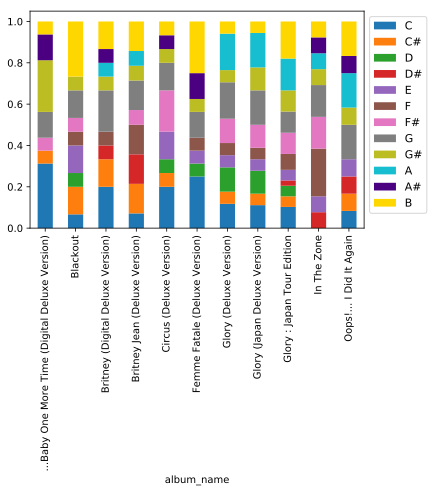

In [168]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fig, ax = plt.subplots()
colors = list(plt.cm.tab10(np.arange(10))) + ["indigo", "gold"]
# ax.set_prop_cycle('color', colors)

# for i in range(12):
#     ax.plot([0,1],[i,i])

# plt.show()

df_features.groupby('album_name')['key']\
    .value_counts(normalize=True)\
    .unstack(level=1)\
    .plot.bar(stacked=True, color=colors, figsize=(6,4))\
    .legend(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'], bbox_to_anchor=(1, 1), fontsize=11)\

%config InlineBackend.figure_formats = ['svg']

In [112]:
df_num_tracks = df_features.groupby(['album_name'], as_index=False).count()[['album_name','id', 'key']]
df_num_tracks

,album_name,id,key
0,...Baby One More Time (Digital Deluxe Version),16,16
1,Blackout,15,15
2,Britney (Digital Deluxe Version),15,15
3,Britney Jean (Deluxe Version),14,14
4,Circus (Deluxe Version),15,15
5,Femme Fatale (Deluxe Version),16,16
6,Glory (Deluxe Version),17,17
7,Glory (Japan Deluxe Version),18,18
8,Glory : Japan Tour Edition,39,39
9,In The Zone,13,13


In [120]:
df_keys = df_features.groupby(['album_name','key'], as_index=False).count()[['album_name','id', 'key']]
num_ids = df_features['id'].count()
# df_keys['album'] = 'Baby One More Time'
df_sorted = df_keys.sort_values(['album_name','key'])
df_sorted

,album_name,id,key
0,...Baby One More Time (Digital Deluxe Version),5,0
1,...Baby One More Time (Digital Deluxe Version),1,1
2,...Baby One More Time (Digital Deluxe Version),1,6
3,...Baby One More Time (Digital Deluxe Version),2,7
4,...Baby One More Time (Digital Deluxe Version),4,8
5,...Baby One More Time (Digital Deluxe Version),2,10
6,...Baby One More Time (Digital Deluxe Version),1,11
7,Blackout,1,0
8,Blackout,2,1
9,Blackout,1,2


In [125]:
test = df_sorted.groupby(['album_name'], as_index=False).sum()[['album_name','id']]
test

,album_name,id
0,...Baby One More Time (Digital Deluxe Version),16
1,Blackout,15
2,Britney (Digital Deluxe Version),15
3,Britney Jean (Deluxe Version),14
4,Circus (Deluxe Version),15
5,Femme Fatale (Deluxe Version),16
6,Glory (Deluxe Version),17
7,Glory (Japan Deluxe Version),18
8,Glory : Japan Tour Edition,39
9,In The Zone,13


In [83]:
df_by_album = df_sorted.groupby('album_name')
for album in df_by_album:
    temp_df = album
temp_df[1]

,album_name,id,key
76,In The Zone,1,0
77,In The Zone,1,1
78,In The Zone,1,3
79,In The Zone,1,4
80,In The Zone,2,7
81,In The Zone,1,8
82,In The Zone,2,9
83,In The Zone,1,10
84,In The Zone,2,11


In [67]:
import matplotlib.pyplot as plt
import numpy as np

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [69]:
key_share_array = []

for key in list(df_sorted['key_share']):
    key_share_array_temp = [key]
    key_share_array.append(key_share_array_temp)

key_share_array

[[0.3125], [0.0625], [0.0625], [0.125], [0.25], [0.125], [0.0625]]

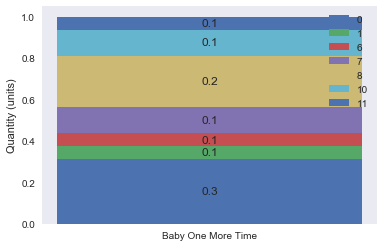

In [70]:
plt.figure(figsize=(6, 4))

series_labels = list(df_keys['key'])

data = key_share_array

category_labels = ['Baby One More Time']

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    y_label="Quantity (units)"
)

plt.show()